###  GR MARKET

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import matplotlib.markers

In [2]:
# filepath = 'C:\\Users\\1098071\\Documents\\RF\\'

In [2]:
df = pd.read_csv('MKTCAP_GR.csv', encoding = 'cp932')
df.head()

,ddate,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
0,2000,2HRA,0.000,43.9143,3.2794,3.2482,34.0403,4.4293,1.0819,17.3527,...,11.8415,-9.3213,14.6434,17.1636,0.191067,inf,inf,0.133741,-0.792145,0.000
1,2000,A1OS,0.000,40.9510,0.2350,-0.7530,44.2850,1.7340,4.4300,19.6690,...,13.5050,-12.8700,12.8810,13.5160,0.017387,inf,inf,0.008256,0.183450,0.000
2,2000,AAA,0.000,10.9207,3.0013,2.0257,83.9710,0.0793,0.0000,0.0000,...,-0.0793,8.0549,78.5441,86.5197,0.034689,inf,inf,0.035742,0.064360,0.000
3,2000,AAD,91.902,34.2833,4.7588,2.6313,24.5565,17.7117,0.0000,21.2303,...,3.5186,-5.9551,1.2367,-1.1998,-3.966328,0.051781,-3.517914,0.280107,0.064143,91.902
4,2000,AAH,0.000,379.5033,31.3202,14.7845,264.9924,20.2257,0.9137,158.0551,...,136.9157,-43.4373,43.3560,136.8344,0.228891,inf,inf,0.149144,0.396824,0.000


In [3]:
df.shape[0]

7813

In [794]:
# type(df['ddate'][0]) #  numpy.int64
# type(d[9])     # int

In [5]:
# # try to convert int time to datetime time 
# # may not be used later 
# import datetime

# d = []
# for i in range(len(df['ddate'])):
#     d.append(datetime.datetime.strptime(np.array_str(df['ddate'].values[i]), '%Y').year)
    
# print (d[9])

### Data prep

In [4]:
# identify columns with all zero values 
zerocol = df.columns[(df == 0).all()]
type(zerocol)
zerocol

Index(['敷金及び保証金', '賞与引当金', '決算発表日', '剰余金の配当', '自己株式の消却', '新株の発行', '土地1',
       '経常利益', '長期社債(当期返済分)'],
      dtype='object')

In [5]:
# drop all columns with zero only values
df2 = df.drop(zerocol, axis = 1)
len(df2.columns)

67

In [6]:
# checking the years with the most data available 
df2.groupby('ddate').count()

,security_code,時価総額,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,...,営業資産,営業負債,有形固定,使用資産,ROIC,EY,MAGIC,ROIC2,EY2,MKTCAP
ddate,,,,,,,,,,,,,,,,,,,,,
2000,347,347,347,347,347,347,347,347,347,347,...,347,347,347,347,347,347,347,347,347,340
2001,350,350,350,350,350,350,350,350,350,350,...,350,350,350,350,347,349,346,347,350,345
2002,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,352,354,351,352,355,345
2003,385,385,385,385,385,385,385,385,385,385,...,385,385,385,385,382,383,382,381,383,360
2004,404,404,404,404,404,404,404,404,404,404,...,404,404,404,404,401,401,401,401,401,368
2005,432,432,432,432,432,432,432,432,432,432,...,432,432,432,432,429,429,428,429,430,397
2006,463,463,463,463,463,463,463,463,463,463,...,463,463,463,463,458,462,458,458,462,442
2007,476,476,476,476,476,476,476,476,476,476,...,476,476,476,476,473,476,473,473,476,461
2008,473,473,473,473,473,473,473,473,473,473,...,473,473,473,473,469,472,468,469,473,451


In [7]:
# prepare 2014 MKTCAP as y

df2014 = df2[df2['ddate'] == 2014][['security_code', 'MKTCAP']]
df2014.head()
# df2014.describe()
len(df2014['security_code'])

531

In [8]:
# # max is at 108753.579700, while the 75% quantile is just 126
# # removing the extremes later in MKTCAP for better visulalizatio and 
# # estimation accuracy 

# print (df2014['MKTCAP'].quantile(0.9))
# print (df2014['MKTCAP'].max())

# print (len(df2014[df2014['MKTCAP'] < 1100]))

In [9]:
# prepare all data in 2013 as features for x

collist = list(df2.columns[1:61])
df2013 = df2[df2['ddate'] == 2013][collist]

# removing '時価総額', which is Market Capitalization
# MKTCAP is the adjusted market capitaliztion with the amount of self owned stocks removed 
del df2013['時価総額']
df2013.head()
# df2013.describe()
# len(df2013['security_code'])

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
5732,1COV,11357.0000,391.0000,180.0000,10133.0000,37.0000,546.000,3829.0000,1021.00,4442.0000,...,2779.0000,-1576.0000,0.173197,0.034428,0.0,-2947.0000,3246.0000,-1794.0000,4442.0000,5894.0000
5733,1PL,167.1170,12.3130,5.3910,221.7340,15.3940,0.000,142.7590,0.00,78.8160,...,151.3110,-48.5030,0.363913,0.073679,0.0,-44.2760,127.3650,-10.7530,78.8160,195.4280
5734,2GB,126.1297,2.7796,0.8943,88.6293,10.4454,0.030,66.7018,0.01,15.8228,...,47.1524,2.7796,0.000000,0.022038,0.0,3.2530,56.2264,-18.8558,15.8228,53.1934
5735,2HRA,1214.3960,-4.4050,-14.0290,594.6560,109.6240,1.797,341.4460,4.10,197.9060,...,189.1620,-4.4050,0.000000,-0.003627,0.0,-76.1810,230.0250,-144.8070,197.9060,283.1240
5736,3GOK,0.3240,-0.1807,-13.9277,4.6553,0.0235,0.000,0.6903,0.00,0.0000,...,1.2313,-0.1807,0.000000,-0.557716,0.0,-0.9965,0.6668,-2.2038,0.0000,-1.5370


In [10]:
# only keeping companies that exist in both 2013 and 2014 
# removing entries with zero MKTCAP
# will only work on data2 later 

data = pd.merge(df2013, df2014, how='inner', on=['security_code']).dropna()
data2 = data[data['MKTCAP'] != 0]

data2.head()
data2.describe()
# len(data2['security_code'])   # 441

,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,短期借入金,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,MKTCAP
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,...,332.000000,332.000000,332.000000,332.0,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,2495.269637,179.371021,112.711053,3369.451480,242.782658,74.789998,1294.487503,330.860806,714.126775,338.121214,...,-400.051680,0.090444,-2.716931,0.0,-424.541579,975.262593,-713.634517,714.264450,975.892526,2531.779416
std,14564.264020,1025.691822,765.169371,22331.871009,1580.868604,626.766808,8485.010142,3585.810322,4348.139813,3519.768869,...,2392.730172,0.186808,26.421361,0.0,3140.235106,6374.959300,4538.267284,4348.117632,6082.379590,12613.931899
min,0.000100,-709.000000,-1436.000000,0.197800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-23929.000000,-0.346011,-373.285714,0.0,-40159.000000,-196.553000,-58639.000000,0.000000,-252.476000,0.074600
25%,14.584975,-0.014700,-0.399175,20.580400,1.264925,0.000000,6.560350,0.000000,0.862300,0.000000,...,-8.908350,0.000000,-0.006111,0.0,-28.387825,3.945750,-66.960500,1.012050,1.502300,12.574926
50%,73.587750,2.230500,0.945150,80.666000,7.183850,0.000000,37.904400,0.359200,13.224150,2.098650,...,0.263100,0.000000,0.046091,0.0,-0.770050,22.597700,-13.149350,13.537500,24.037500,58.098150
75%,320.444250,20.427500,12.047000,353.780500,40.877500,1.161675,160.516250,5.004750,112.626250,23.460250,...,5.493275,0.000000,0.112062,0.0,5.271375,108.618000,-3.183675,112.626250,170.489100,336.415878
max,197007.000000,11671.000000,9066.000000,324333.000000,23178.000000,8492.000000,122192.000000,55566.000000,49939.000000,59986.000000,...,960.100000,0.873727,7.848586,0.0,2563.000000,90522.000000,301.408000,49939.000000,74271.000000,108753.579700


In [11]:
print (len(data['security_code']))
len(data2['security_code'])

492


332

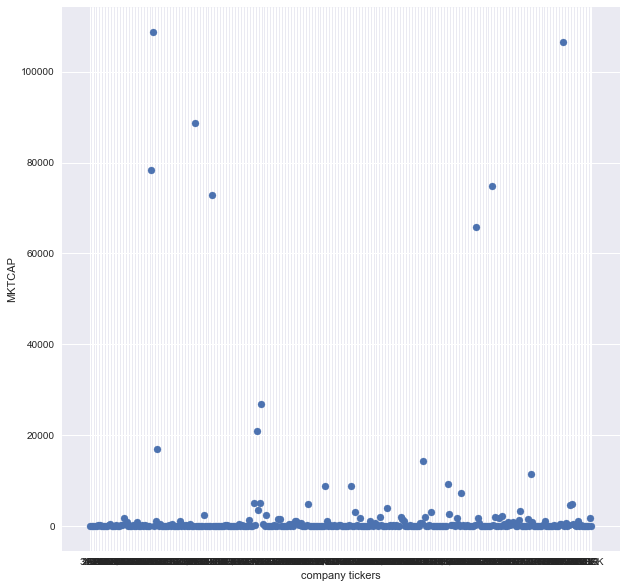

In [12]:
# scatter plot all available data; MKTCAP from 2014 and featueres from 2013 

fig = plt.figure(figsize = (10,10))

num =  len(data2['security_code']) 
x = np.arange(num)
y = data2['MKTCAP']
my_xticks = list(data2['security_code'].values)
plt.xticks(x, my_xticks)
plt.scatter(x, y)
plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

In [13]:
# 332 pairs of data in the original dataset
# plot of companies with less than 1000 MKTCAP

plot = data2[data2['MKTCAP'] < 800]
# plot.describe()

# companies with less than 200 MKTCAP  
plot2 = data2[data2['MKTCAP'] < 200]

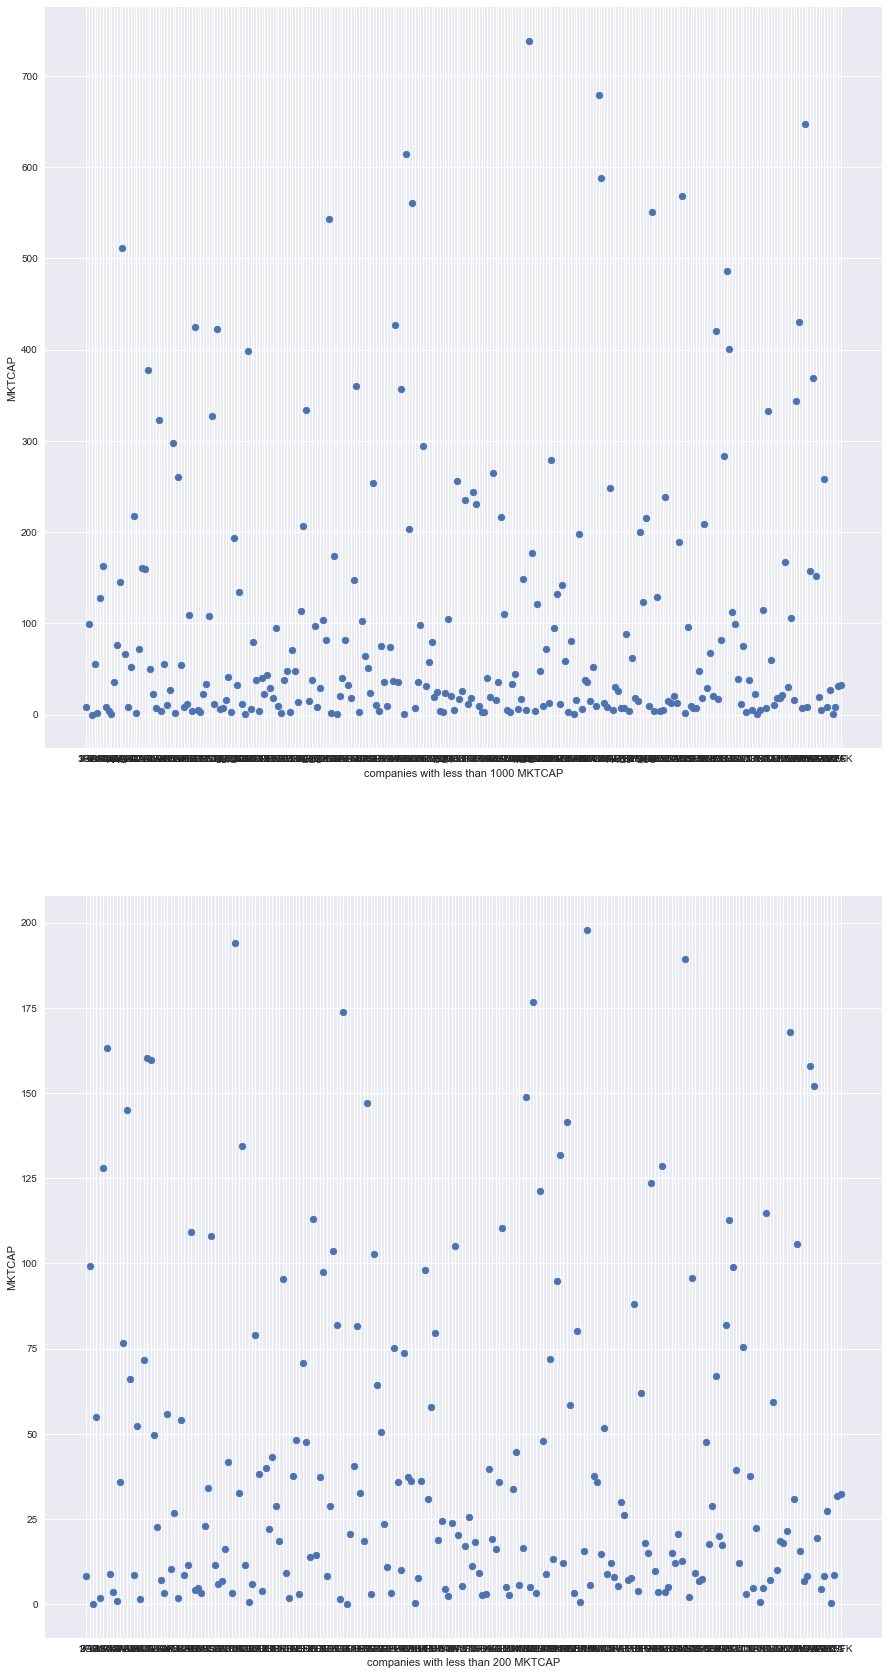

In [14]:
# zoom in

fig = plt.figure(figsize = (15, 30))
ax = plt.subplot(2, 1, 1)

num = plot.shape[0]
x = np.arange(num)
my_xticks = list(plot['security_code'].values)
plt.xticks(x, my_xticks)
y = plot['MKTCAP']

plt.xlabel('companies with less than 1000 MKTCAP')
plt.ylabel('MKTCAP')
plt.scatter(x, y)


# further zoom in
ax = plt.subplot(2, 1, 2)

num2 = plot2.shape[0]
x2 = np.arange(num2)
my_xticks2 = list(plot2['security_code'].values)
plt.xticks(x2, my_xticks2)
y2 = plot2['MKTCAP']

plt.xlabel('companies with less than 200 MKTCAP')
plt.ylabel('MKTCAP')
plt.scatter(x2, y2)


plt.show()

In [17]:
# np.array_str(df2['security_code'].values)

### RF Training 

In [15]:
# use 2013 data to predict 2014 MKTCAP

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [16]:
# features from data in 2013
featurelist = data2.columns[1:59]
print (len(featurelist))
data2[featurelist].head()

58


,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,短期借入金,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
1,167.1170,12.3130,5.3910,221.7340,15.3940,0.0000,142.7590,0.0000,78.8160,57.500,...,151.3110,-48.5030,0.363913,0.073679,0.0,-44.2760,127.3650,-10.7530,78.8160,195.4280
2,126.1297,2.7796,0.8943,88.6293,10.4454,0.0300,66.7018,0.0100,15.8228,0.000,...,47.1524,2.7796,0.000000,0.022038,0.0,3.2530,56.2264,-18.8558,15.8228,53.1934
4,0.3240,-0.1807,-13.9277,4.6553,0.0235,0.0000,0.6903,0.0000,0.0000,0.000,...,1.2313,-0.1807,0.000000,-0.557716,0.0,-0.9965,0.6668,-2.2038,0.0000,-1.5370
5,60.8263,1.0161,0.7158,78.0599,3.5673,1.4441,32.0063,2.7374,39.9750,1.496,...,65.9583,1.0161,0.000000,0.016705,0.0,-0.9106,26.9949,-7.8704,42.7124,61.8369
6,0.0031,-0.2131,-0.2095,1.7056,0.2130,0.0000,0.2359,0.9691,0.0006,0.000,...,1.6809,-0.2131,0.000000,-68.741935,0.0,1.1821,0.0229,-0.0247,0.0006,-0.0012


In [17]:
# training testing data split 4:1, set random_state to keep datapoints the same in each run 

x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0)

x_train.shape

(265, 58)

In [18]:
# initial regression model with default values  
regr = RandomForestRegressor(random_state=0, bootstrap=True, oob_score = True)
regr.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [19]:
# coefficient of determination R^2 of the regression on tesing data 
regr.score(x_test, y_test)

0.58387068729215752

In [20]:
# use OOB sample to estimate the R^2 on unseen data in training RF
print (regr.oob_score_)

# print (regr.oob_prediction_)

0.756557194997


In [21]:
# error estimation using OOB estimation on training data 
# according to some resesrch, this OOB estiamtion of error is accurate as long as enough trees are grown 

### Variable importance from the default RF model 

In [22]:
# feature importance exploration  
# number of features in the model is 58

importances = regr.feature_importances_
# return indices of the most important featuer last, use [::-1] to reverse order
indices = np.argsort(importances)[::-1]

# standard devivation along columns/ trees
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

In [23]:
print("Feature ranking(top down):")

for f in range(x_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print ('{}. feature {}, which is {}, has an importance of {}'.format(f + 1, indices[f], featurelist[indices[f]], importances[indices[f]]))


Feature ranking(top down):
1. feature 57, which is 使用資産, has an importance of 0.27585042310757835
2. feature 25, which is 剰余金, has an importance of 0.10413187931801711
3. feature 0, which is 売上, has an importance of 0.09649194823479305
4. feature 3, which is 総資産, has an importance of 0.09554176696503093
5. feature 35, which is 人件費, has an importance of 0.09347308639485179
6. feature 9, which is 短期借入金, has an importance of 0.09269240985046363
7. feature 40, which is 流動資産その他, has an importance of 0.0926027219279889
8. feature 43, which is 投資資産その他, has an importance of 0.09056535335838352
9. feature 4, which is 現金･現金同等物, has an importance of 0.010712481769465185
10. feature 39, which is 発行済株式数, has an importance of 0.005978956418988259
11. feature 1, which is 営業利益, has an importance of 0.005936029436588948
12. feature 12, which is 無形資産, has an importance of 0.005397270528314909
13. feature 18, which is 売上総利益, has an importance of 0.005224163543317127
14. feature 26, which is 資本金, has an i

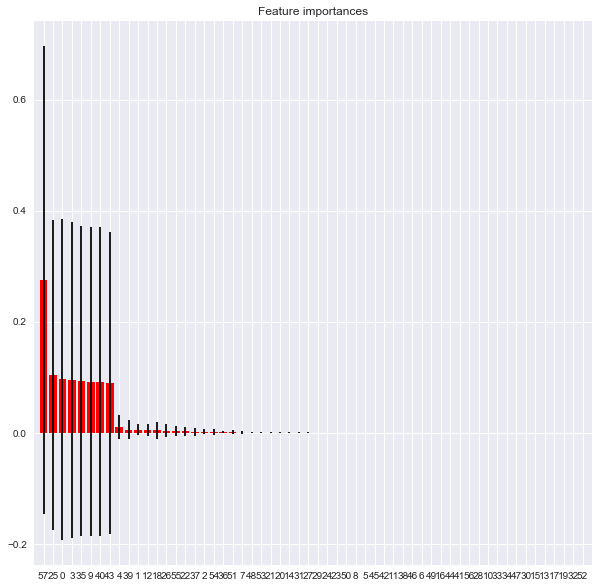

In [24]:
# feature importaance plot 

fig = plt.figure(figsize = (10, 10))

plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [25]:
# # prediction on testing set 
# print (regr.predict(x_test))

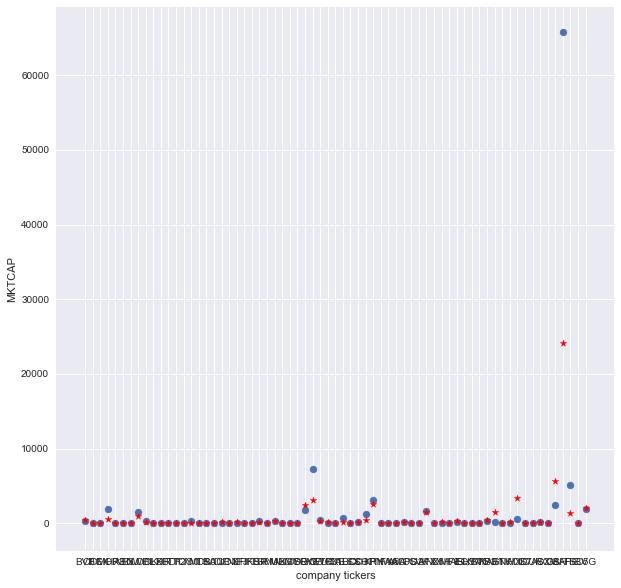

In [26]:
# testing size: 67

fig = plt.figure(figsize = (10,10))
ax = plt.subplot(1, 1, 1)

num_predict = len(x_test)
x = np.arange(num_predict)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

# ax. scatter(x_test, regr.predict(x_test))

y1 = regr.predict(x_test)
plt.xticks(x, my_xticks)

ax.scatter(x, y1, color = 'red', marker = '*')  # red dots are predicted MKTCAP from testing data 
plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

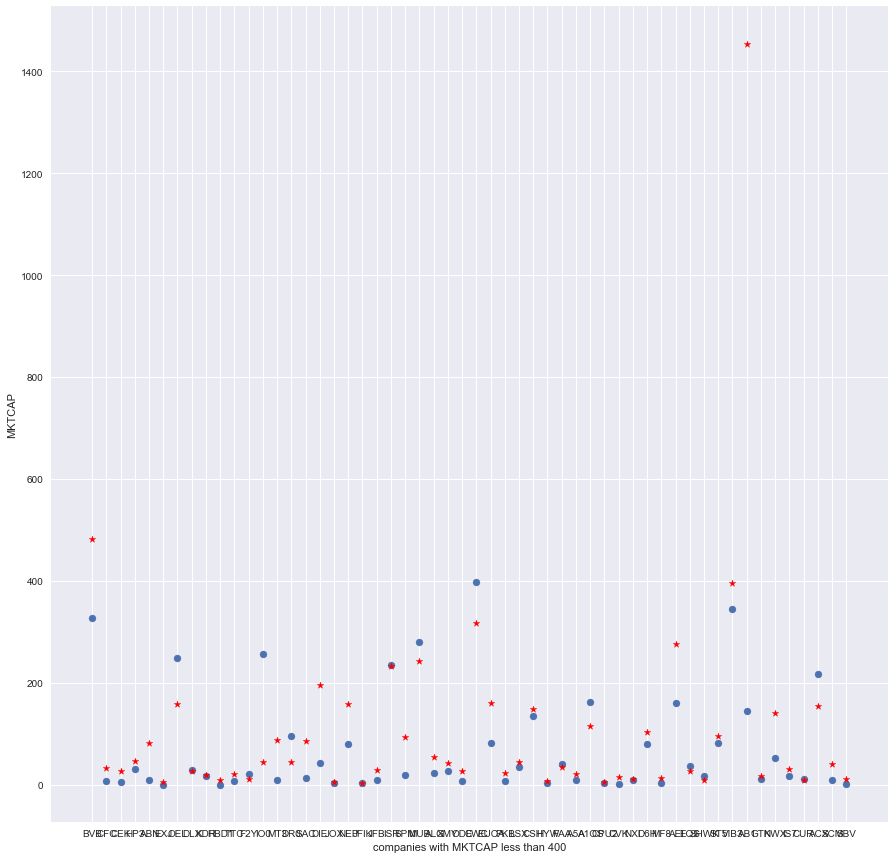

In [27]:
# zoom in plots
# data siz: 54

data_zoom = data2.loc[list(y_test[y_test < 400].index)]

fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_zoom = data_zoom.shape[0]
x = np.arange(num_zoom)
y = data_zoom['MKTCAP'].values
my_xticks = list(data_zoom['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

# ax. scatter(x_test, regr.predict(x_test))

y1 = regr.predict(data_zoom[featurelist])
plt.xticks(x, my_xticks)

ax.scatter(x, y1, color = 'red', marker = '*')  # red dots are predicted MKTCAP from testing data 
plt.ylabel('MKTCAP')
plt.xlabel('companies with MKTCAP less than 400')

plt.show()

In [29]:
# y_test.describe()

In [30]:
# pd.DataFrame(regr.predict(x_test)).describe()

In [31]:
# type(data2['security_code'].loc[x_test.index].values)

### 5-fold CV model evaluation on default model 

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
regr = RandomForestRegressor(random_state=0)
scores = cross_val_score(regr, data2[featurelist], data2['MKTCAP'], cv = 5, scoring = 'r2')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
print (scores)
print (sum(scores)/5)

[ 0.84366462  0.96116501 -1.2880583   0.81864519  0.86571023]
0.440225347768


move on to parameter tuning using grid search and cross validation score 

### OOB score and RF with different max_features, n_estimators

In [30]:
regr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably

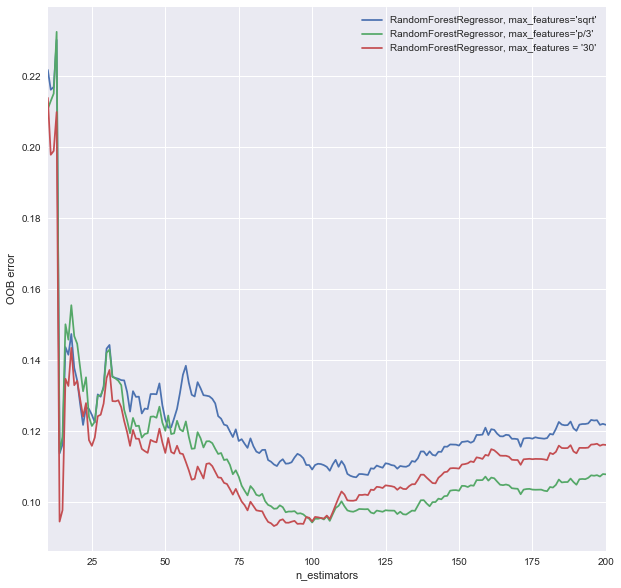

In [32]:
from collections import OrderedDict
# use (1 - OOB_score_) preliminary checking on the number of trees needed in the forest

# x = data2[featurelist]
# y = data2['MKTCAP']

x = x_train
y = y_train

p = len(featurelist)

ensemble_regs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(max_features = 'sqrt', random_state = 0, bootstrap=True, oob_score = True)),
    ("RandomForestRegressor, max_features='p/3'",
        RandomForestRegressor(max_features = int(p/3), random_state = 0, bootstrap=True, oob_score = True)),
    ("RandomForestRegressor, max_features = '30'",
        RandomForestRegressor(max_features = 30, random_state = 0, bootstrap=True, oob_score = True))
]

# Map a regressor name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_regs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 200


for label, reg in ensemble_regs:
    for i in range(min_estimators, max_estimators + 1):
        reg.set_params(n_estimators=i)
        reg.fit(x, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - reg.oob_score_
        error_rate[label].append((i, oob_error))

fig = plt.figure(figsize = (10, 10))
        
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, reg_err in error_rate.items():
    xs, ys = zip(*reg_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error")
plt.legend(loc="upper right")

plt.show()

#### RF & max_features

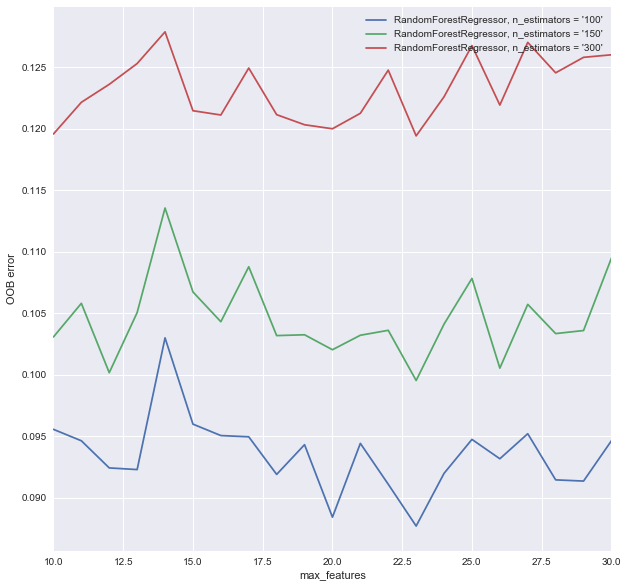

In [33]:
from collections import OrderedDict
# use (1 - OOB_score_) preliminary on the number of trees needed in the forest

# x = data2[featurelist]
# y = data2['MKTCAP']

x = x_train
y = y_train

ensemble_regs = [
    ("RandomForestRegressor, n_estimators = '100'",
        RandomForestRegressor(n_estimators = 100, random_state = 0, bootstrap=True, oob_score = True)),
    ("RandomForestRegressor, n_estimators = '150'",
        RandomForestRegressor(n_estimators = 150, random_state = 0, bootstrap=True, oob_score = True)),
    ("RandomForestRegressor, n_estimators = '300'",
        RandomForestRegressor(n_estimators = 300, random_state = 0, bootstrap=True, oob_score = True))
]

# Map a regressor name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_regs)

# Range of `max_features` values to explore.
# p is the number of predictors in the model

p = len(featurelist) 
# min_features = int(p **(1/2))
# max_features = int(p /3)

min_features = 10
max_features = 30


# min_estimators = 200
# max_estimators = 600


for label, reg in ensemble_regs:
    for i in range(min_features, max_features + 1):
        reg.set_params(max_features = i)
        reg.fit(x, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - reg.oob_score_
        error_rate[label].append((i, oob_error))

fig = plt.figure(figsize = (10, 10))
        
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, reg_err in error_rate.items():
    xs, ys = zip(*reg_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_features, max_features)
plt.xlabel("max_features")
plt.ylabel("OOB error")
plt.legend(loc="upper right")


plt.show()

### Parameter tuning

In [34]:
from sklearn.grid_search import GridSearchCV

# data 
x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [35]:
model = RandomForestRegressor(random_state = 0, oob_score = True, bootstrap = True)
param_grid = { "n_estimators"      : [100, 150, 50],
           "max_features"      : ['sqrt', 30, int(p/3)],
           "max_depth"         : [None],
#            "min_samples_split" : [2, 3, 4]
             }
grid_search = GridSearchCV(model, param_grid, scoring = 'r2', n_jobs = -1, cv = 5)
grid_search.fit(x_train, y_train)
print (grid_search.best_params_)

{'max_depth': None, 'max_features': 19, 'n_estimators': 50}


In [36]:
# grid_search.grid_scores_

In [37]:
model_tuned = RandomForestRegressor(**grid_search.best_params_, random_state = 0, oob_score = True, bootstrap = True)
model_tuned.fit(x_train, y_train)

# model.set_params(grid_search.best_params_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=19, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [38]:
# model_tuned.oob_prediction_
# error estimation using OOB estimation on training data 
model_tuned.oob_score_

0.87985655726734824

In [39]:
# performance on testing data 

model_tuned.score(x_test, y_test)

0.64699853401803353

In [40]:
# modeleval using 5-fold CV

scores = cross_val_score(model_tuned, data2[featurelist], data2['MKTCAP'], cv = 5, scoring = 'r2')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
print (scores)
print (sum(scores)/5)


[ 0.86225479  0.95399349 -0.38478369  0.8480679   0.86648204]
0.629202905998


In [41]:
# initial regression model with default values  
regr = RandomForestRegressor(random_state=0, bootstrap=True, oob_score = True)
regr.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

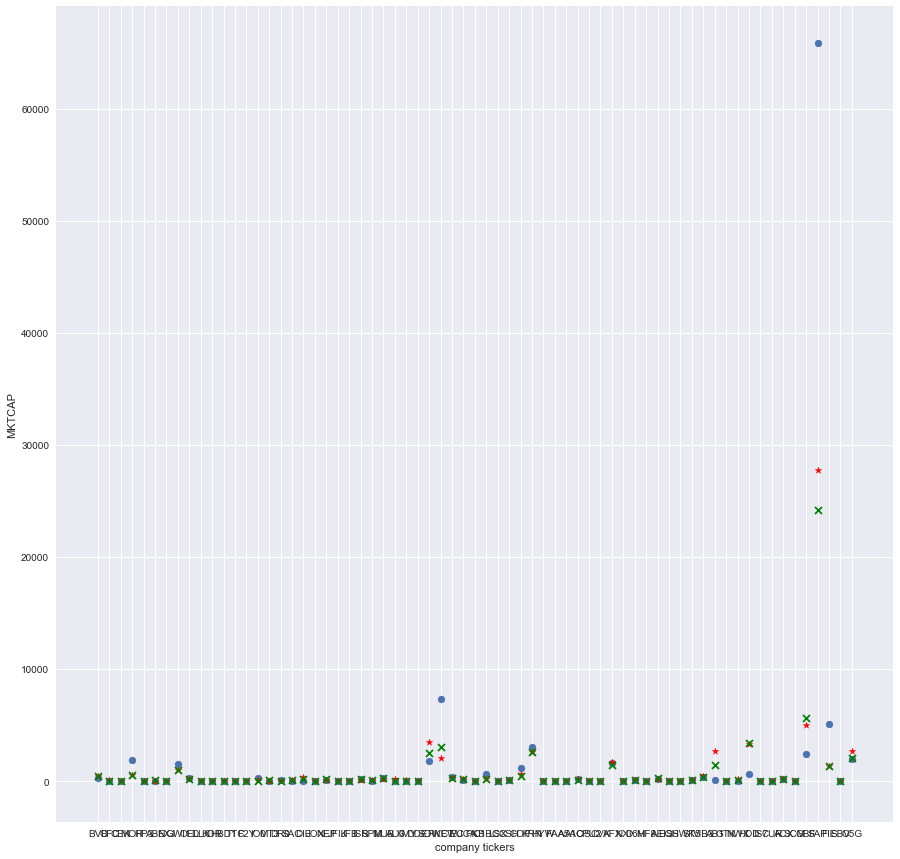

In [42]:
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = len(x_test)
x = np.arange(num_predict)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)

y2 = model_tuned.predict(x_test)
ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model


y1 = regr.predict(x_test)
ax.scatter(x, y1, color = 'green', marker = 'x')    # green xs are predicted MKTCAP from initial model with default parameters 

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

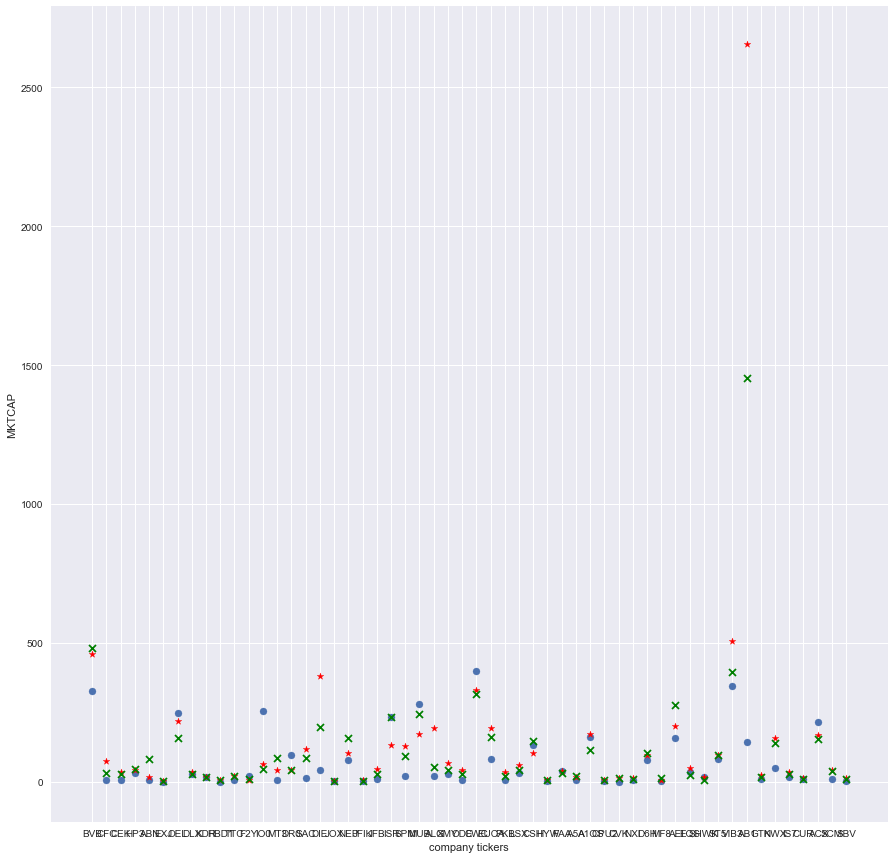

In [43]:
# zoom in plots
# data siz: 54

data_zoom = data2.loc[list(y_test[y_test < 400].index)]

fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = data_zoom.shape[0]
x = np.arange(num_predict)
y = data_zoom['MKTCAP'].values
my_xticks = list(data_zoom['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)


y2 = model_tuned.predict(data_zoom[featurelist])
ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model


y1 = regr.predict(data_zoom[featurelist])
ax.scatter(x, y1, color = 'green', marker = 'x')    # green xs are predicted MKTCAP from initial model with default parameters 


plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

In [44]:
# feature importance from tuned model  
# number of features put into the model is 58

importances = model_tuned.feature_importances_
# return indices of the most important featuer last, use [::-1] to reverse order
indices = np.argsort(importances)[::-1]

# standard devivation along columns/ trees
std = np.std([tree.feature_importances_ for tree in model_tuned.estimators_], axis=0)

In [45]:
print("Feature ranking(top down):")

for f in range(x_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print ('{}. feature {}, which is {}, has an importance of {}'.format(f + 1, indices[f], featurelist[indices[f]], importances[indices[f]]))


Feature ranking(top down):
1. feature 49, which is 販管費, has an importance of 0.06188570566891033
2. feature 1, which is 営業利益, has an importance of 0.05813357842950501
3. feature 27, which is 売上原価, has an importance of 0.0577482493945858
4. feature 43, which is 投資資産その他, has an importance of 0.05737726851021674
5. feature 57, which is 使用資産, has an importance of 0.056505258211072634
6. feature 18, which is 売上総利益, has an importance of 0.05389259330188504
7. feature 4, which is 現金･現金同等物, has an importance of 0.04695092769792552
8. feature 25, which is 剰余金, has an importance of 0.042663151268978246
9. feature 29, which is 自己資本, has an importance of 0.041550577765175935
10. feature 37, which is 非流動資産合計, has an importance of 0.040685133239565865
11. feature 3, which is 総資産, has an importance of 0.03773775977438366
12. feature 35, which is 人件費, has an importance of 0.0375194755694227
13. feature 42, which is 無形資産その他, has an importance of 0.037380604942341154
14. feature 8, which is 有形固定資産, has 

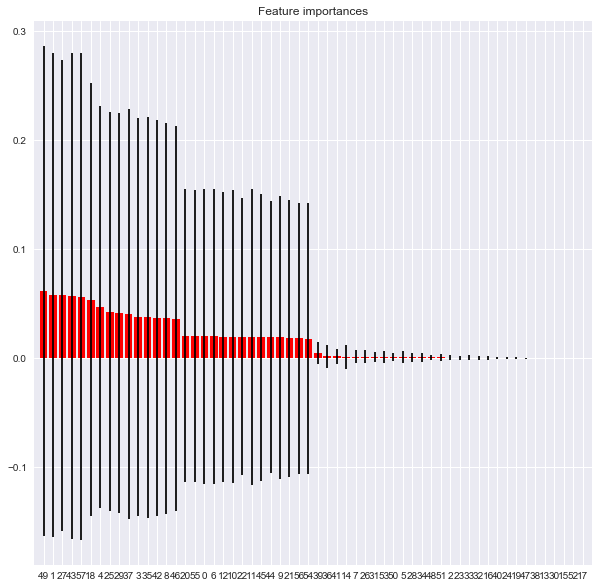

In [46]:
# feature importance plot 

fig = plt.figure(figsize = (10, 10))

plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### Tuned model on MKTCAP in 2013 and features in 2012

In [47]:
# df.groupby('ddate').count()

In [48]:
# prepare 2013 MKTCAP as y

df2013 = df2[df2['ddate'] == 2013][['security_code', 'MKTCAP']]
df2013.head()
# df2013.describe()
# len(df2013['security_code'])

,security_code,MKTCAP
5732,1COV,NaN
5733,1PL,30.1950
5734,2GB,134.6720
5735,2HRA,256.5099
5736,3GOK,0.1493


In [49]:
# prepare all data in 2012 as features for x

collist = list(df2.columns[1:61])
df2012 = df2[df2['ddate'] == 2012][collist]

# removing '時価総額', which is Market Capitalization
# MKTCAP is the adjusted market capitaliztion with the amount of self owned stocks removed 
del df2012['時価総額']
df2012.head()
# df2012.describe()
# len(df2012['security_code'])

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,株主資本,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産
5206,02P,0.0380,-3.3357,-3.3461,199.3196,0.0176,0.0000,59.2041,140.1148,0.0008,...,198.5418,-3.3357,0.000000,-87.781579,0.0,140.1324,59.1865,-0.6292,0.0008,58.5581
5207,1COV,11610.0000,542.0000,261.0000,10465.0000,44.0000,344.0000,3955.0000,1028.0000,4577.0000,...,2579.0000,-1762.0000,0.198450,0.046684,0.0,-3328.0000,3567.0000,-1983.0000,4577.0000,6161.0000
5208,1PL,190.9720,35.2960,23.9950,213.2670,64.1080,0.0000,138.9020,0.0010,73.3600,...,147.4790,-47.8300,0.435278,0.184823,0.0,27.7000,74.7940,-29.3790,73.3600,118.7750
5209,2GB,146.4849,16.6436,11.4252,94.7422,14.0932,0.3252,73.9049,0.0113,14.5842,...,47.7543,16.6436,0.000000,0.113620,0.0,4.0852,59.4865,-36.5820,14.5842,37.4887
5210,2HRA,1228.9450,26.5350,0.4570,623.1090,89.5880,1.1990,351.1030,4.5810,219.1170,...,213.2830,26.5350,0.000000,0.021592,0.0,-162.4110,260.3160,-81.4360,219.1170,397.9970


In [50]:
# only keeping companies that exist in both 2013 and 2014 
# removing entries with zero MKTCAP

data = pd.merge(df2012, df2013, how='inner', on=['security_code']).dropna()
data3 = data[data['MKTCAP'] != 0]

data3.head()
# data.describe()
# len(data3['security_code'])   # 322

,security_code,売上,営業利益,純利益,総資産,現金･現金同等物,有価証券,流動資産,総長期投資,有形固定資産,...,販管費,売上総利益率,営業利益率,株主還元,純現金資産,営業資産,営業負債,有形固定,使用資産,MKTCAP
1,1PL,190.9720,35.2960,23.9950,213.2670,64.1080,0.0000,138.9020,0.0010,73.3600,...,-47.8300,0.435278,0.184823,0.0,27.7000,74.7940,-29.3790,73.3600,118.7750,30.195000
2,2GB,146.4849,16.6436,11.4252,94.7422,14.0932,0.3252,73.9049,0.0113,14.5842,...,16.6436,0.000000,0.113620,0.0,4.0852,59.4865,-36.5820,14.5842,37.4887,134.672000
3,2HRA,1228.9450,26.5350,0.4570,623.1090,89.5880,1.1990,351.1030,4.5810,219.1170,...,26.5350,0.000000,0.021592,0.0,-162.4110,260.3160,-81.4360,219.1170,397.9970,256.509900
4,3GOK,0.3240,-0.1347,0.2577,16.5240,0.2250,0.0000,0.6350,0.0000,0.0000,...,-0.1347,0.000000,-0.415741,0.0,-0.7950,0.4100,-0.2040,0.0000,0.2060,0.149300
5,4DS,22.6903,2.2841,1.1644,101.4506,5.8625,0.0716,33.2203,0.1419,41.3671,...,2.2841,0.000000,0.100664,0.0,-3.0224,27.2862,-13.4676,41.4787,55.2973,71.793981


In [51]:
featurelist = data3.columns[1:59]
x = data3[featurelist]
y = data3['MKTCAP']

print (model_tuned.oob_score_)
model_tuned.score(x, y)

0.879856557267


0.88122607223363114

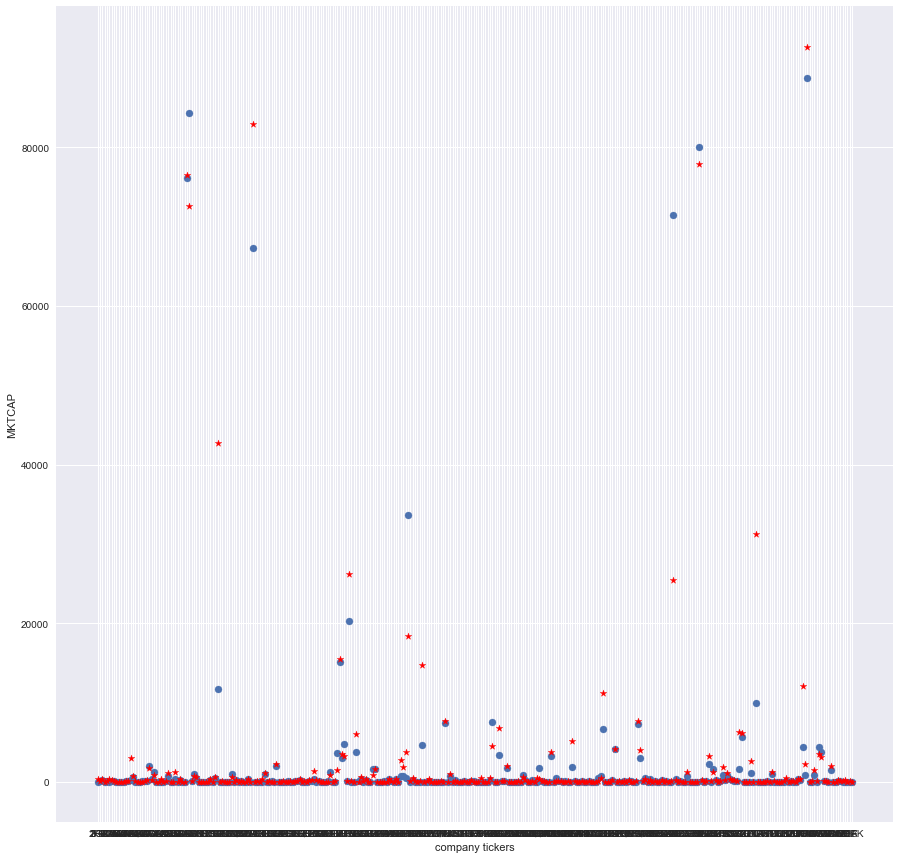

In [52]:
fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = len(x)
x = np.arange(num_predict)
y = data3['MKTCAP'].values
my_xticks = list(data3['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)


y2 = model_tuned.predict(data3[featurelist])
plt.xticks(x, my_xticks)

ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

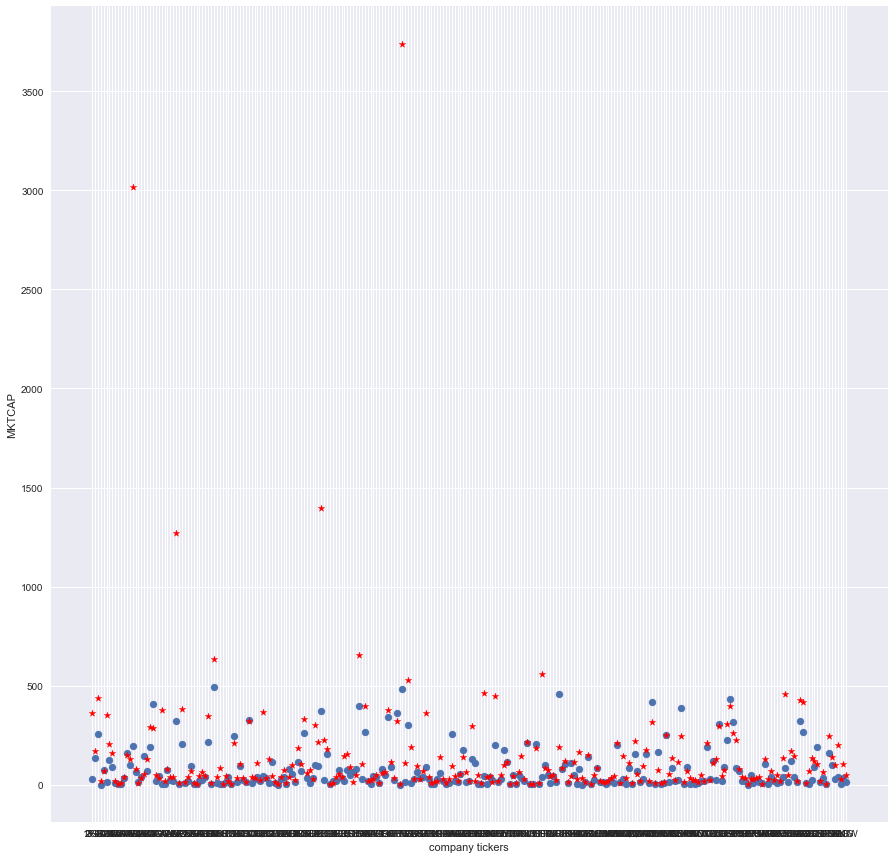

In [53]:
# zoom in plot 
# data size: 261, originally, the size is 322

data_zoom = data3[data3['MKTCAP'] < 500]


fig = plt.figure(figsize = (15,15))
ax = plt.subplot(1, 1, 1)

num_predict = data_zoom.shape[0]
x = np.arange(num_predict)
y = data_zoom['MKTCAP'].values
my_xticks = list(data3['security_code'].values)
plt.xticks(x, my_xticks)   # blue dots are actual values 
plt.scatter(x, y)


y2 = model_tuned.predict(data_zoom[featurelist])
ax.scatter(x, y2, color = 'red', marker = '*')  # red stars are predicted MKTCAP from the tuned model

plt.ylabel('MKTCAP')
plt.xlabel('company tickers')

plt.show()

### Look at MSE

In [54]:
# MSE on RF regressor prediction 
model_tuned.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=19, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)>

In [55]:
x = data2[featurelist]
y = data2['MKTCAP']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0 )

In [56]:
import math 
predicts = model_tuned.predict(x_test)

# MSE on testing data and compare this with the MSE from training data to see if  the model overfits the data 

sse = []
for i in range(len(predicts)):
    sse.append(math.log10((y_test.iloc[i] - predicts[i]) **2))
    
MSE = sum(sse)/len(predicts)
print ('MSE from testing data is {}'. format(MSE))

MSE from testing data is 3.3992799380114653


In [57]:
# MSE on training data 

train_pred = model_tuned.predict(x_train)

sse2 = []
for i in range(len(predicts)):
    sse2.append(math.log10((y_train.iloc[i] - train_pred[i]) **2))
    
MSE2 = sum(sse2)/len(train_pred)
print ('MSE from training data is {}'. format(MSE2))

MSE from training data is 0.6235853478414894


In [58]:
pd.DataFrame(sse).describe()

,0
count,67.000000
mean,3.399280
std,1.917296
min,0.007859
25%,2.126062
50%,3.065395
75%,4.336451
max,9.161158


### save the model for further



In [348]:
import pickle 

In [391]:
# save the model to disk
filename = 'GR_model.sav'
pickle.dump(model_tuned, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

### feature correlation 

In [60]:
# data2[featurelist].corr()

In [62]:
# data2[data2['株主還元'] != 0]

In [61]:
import heapq

# heapq.nlargest(40, data2['MKTCAP'])

In [444]:
# len(data2[data2['MKTCAP']  < 1000]) / len(data2['MKTCAP'])

0.8343373493975904

### LASSO

In [74]:
x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0)

x_train.shape

(265, 58)

In [75]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
reg.score(x_test, y_test)

0.90269431369481656

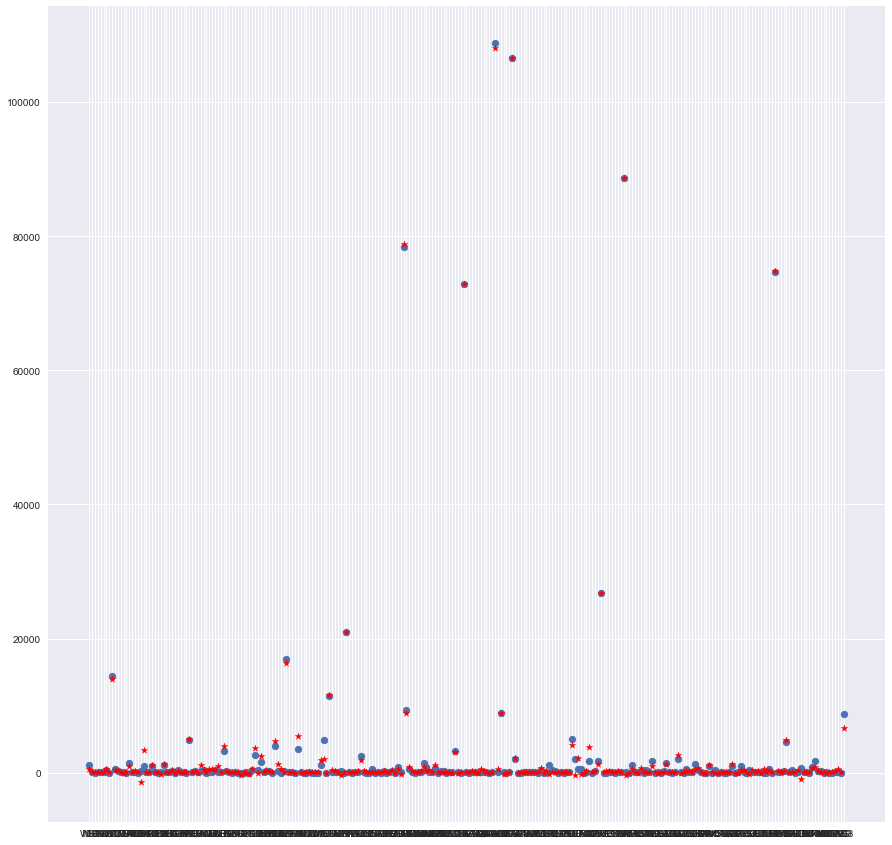

In [77]:
# regularized linear regression -- training & truth

fig = plt.figure(figsize = (15, 15))
ax = plt.subplot(1, 1, 1)

num = x_train.shape[0]
x = np.arange(num)
y = data2['MKTCAP'].loc[y_train.index].values
my_xticks = list(data2['security_code'].loc[x_train.index].values)
plt.xticks(x, my_xticks)   
# scatter plot of the training data 
plt.scatter(x, y)

# regression line given by the trining data 
ax.scatter(x, reg.predict(x_train), color = 'red', marker = '*')
plt.xticks(x, my_xticks)

plt.show()


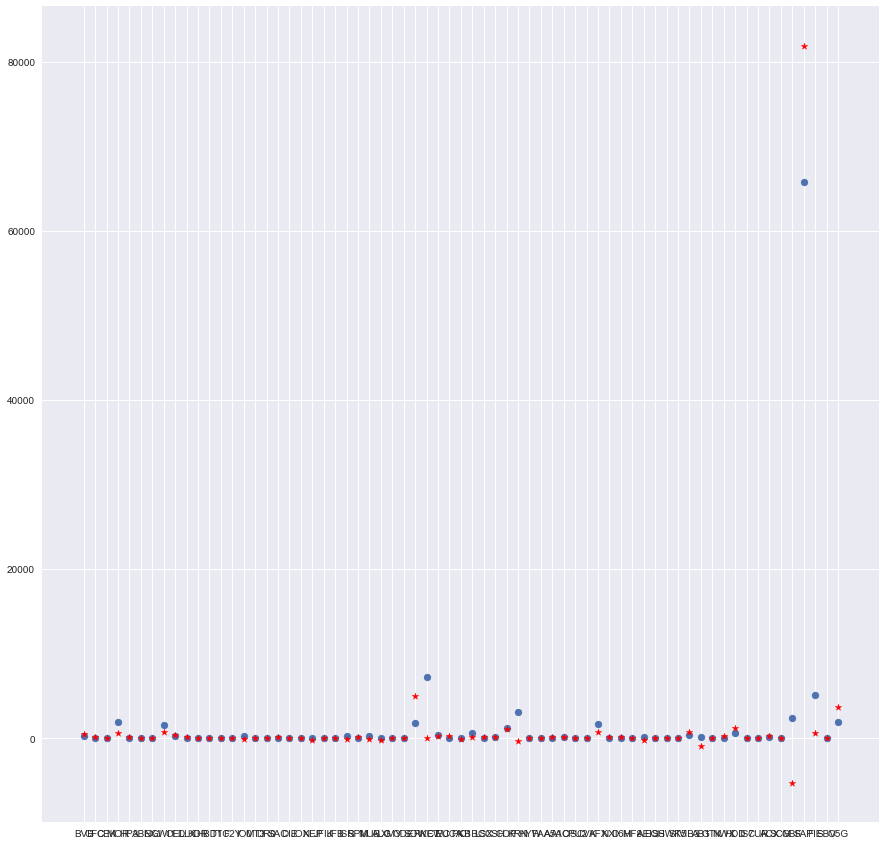

In [78]:
# LASSO on testing data 

fig = plt.figure(figsize = (15, 15))
ax = plt.subplot(1, 1, 1)

num = x_test.shape[0]
x = np.arange(num)
y = data2['MKTCAP'].loc[y_test.index].values
my_xticks = list(data2['security_code'].loc[x_test.index].values)
plt.xticks(x, my_xticks)   
# scatter plot of the training data 
plt.scatter(x, y)

# regression given by the trining data 
ax.scatter(x, reg.predict(x_test), color = 'red', marker = '*')
plt.xticks(x, my_xticks)

plt.show()


In [79]:
import math 
predicts = reg.predict(x_test)

# MSE on testing data and compare this with the MSE from training data to see if  the model overfits the data 

sse = []
for i in range(len(predicts)):
    sse.append(math.log10((y_test.iloc[i] - predicts[i]) **2))
    
MSE = sum(sse)/len(sse)
print ('MSE from testing data is {}'. format(MSE))

MSE from testing data is 4.304781020670508


In [80]:
import math 
predicts = reg.predict(x_train)

# MSE on training data
sse = []
for i in range(len(predicts)):
    sse.append(math.log10((y_train.iloc[i] - predicts[i]) **2))
    
MSE = sum(sse)/len(sse)
print ('MSE from training data is {}'. format(MSE))

MSE from training data is 3.91393054049001


In [81]:
xc = data3[featurelist]
yc =  data3['MKTCAP']

print (reg.score(xc, yc))
print (regr.score(xc, yc))
print (model_tuned.score(xc, yc))

0.825728967789
0.829714896455
0.881226072234


### CV on initial LASSO eval

In [82]:
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(x_train, y_train)
scores = cross_val_score(reg, data2[featurelist], data2['MKTCAP'], cv = 5, scoring = 'r2')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
print (scores)
print (sum(scores)/5)

[ 0.87483115 -0.89262254 -0.13415559  0.8413962   0.94740955]
0.327371754549


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

### LASSO Tuning 

In [83]:
x_test, x_train, y_test, y_train = train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0)

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
alphas = np.arange(0.01, 1, 0.01)

param_grid = dict(alpha = alphas)

cv = KFold(n_splits = 5, shuffle = False, random_state = 0)
grid = GridSearchCV(linear_model.Lasso(), param_grid =  param_grid, cv = cv, scoring = 'r2')
grid.fit(data2[featurelist], data2['MKTCAP'])

print("The best parameters are %s with a score of %0.2f"
  % (grid.best_params_, grid.best_score_))

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

The best parameters are {'alpha': 0.98999999999999999} with a score of 0.33


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [87]:
print (grid.best_params_, grid.best_score_)

{'alpha': 0.98999999999999999} 0.332328693403


In [124]:
reg_tuned = linear_model.Lasso(**grid.best_params_)
reg_tuned.fit(x_train, y_train)
scores = cross_val_score(reg_tuned, data2[featurelist], data2['MKTCAP'], scoring = 'r2', cv = 5 )

print (scores)
print (sum(scores)/5)

[ 0.87462982 -0.85963912 -0.13435736  0.84309264  0.94776093]
0.334297380353


C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_m

In [90]:
reg_tuned.score(x_test,y_test)

-14.776498967193163

In [103]:
import math

# x is data frame here y is a np array 
def MSE(x, y, model):
    predicts = model.predict(x)
    sse =[]
    for i in range(len(x)):
        sse.append(math.log10((y.iloc[i] - predicts[i]) ** 2))
    
    return sum(sse)/len(sse)

In [104]:
def search_alpha(alphas):
    
    raw_mse = {}

    for j in alphas:

        MSE_list = []
        for i in range(5):
        # need to iterate through each fold of the splited data and train, test, calculate the averaged MSE            
            x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0 )
            lasso = linear_model.Lasso(alpha = j)
            lasso.fit(x_train, y_train)
            MSE_list.append(MSE(x_test, y_test, lasso))

            raw_mse[j] = MSE_list   

    return raw_mse


In [105]:
alphas = list(np.arange(0.01, 1, 0.01) )
raw = search_alpha(alphas)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [106]:
mse = []
for i in raw.keys():
    mse.append(sum(raw[i])/len(raw[i]))

In [107]:
print (min(mse))

# index starts from zero
mse.index(min(mse))

4.197481115449613


92

In [111]:
list(raw.keys())[mse.index(min(mse))]

0.93000000000000005

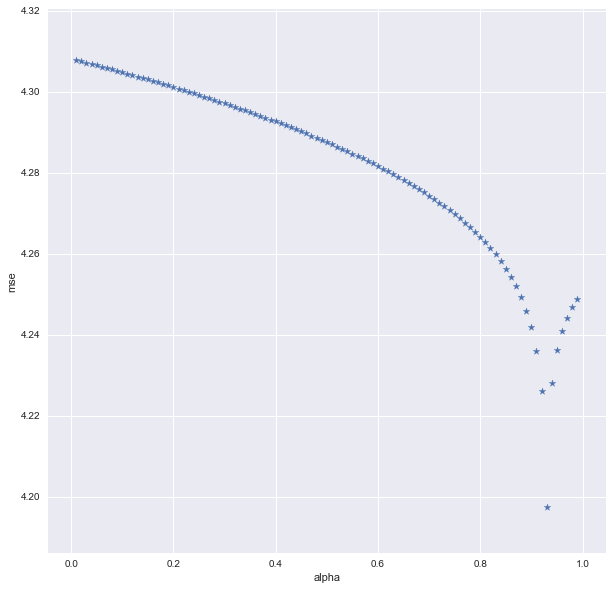

In [110]:
fig = plt.figure(figsize = (10, 10))

plt.scatter(alphas, mse, marker = '*')
plt.xlabel('alpha')
plt.ylabel('mse')

plt.show()

In [112]:
reg_tuned2 = linear_model.Lasso(alpha = list(raw.keys())[mse.index(min(mse))])
reg_tuned2.fit(x_train, y_train)

C:\Users\1098071\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.93000000000000005, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
import math 
predicts = reg_tuned2.predict(x_train)

# MSE on training data 
sse = []
for i in range(len(predicts)):
    sse.append(math.log10((y_train.iloc[i] - predicts[i]) **2))
    
MSE = sum(sse)/len(sse)
print ('MSE from testing data is {}'. format(MSE))

MSE from testing data is 3.3339015441706725


In [114]:
import math 
predicts = reg_tuned2.predict(x_test)

# MSE on testing data and compare this with the MSE from training data to see if  the model overfits the data 

sse = []
for i in range(len(predicts)):
    sse.append(math.log10((y_test.iloc[i] - predicts[i]) **2))
    
MSE = sum(sse)/len(sse)
print ('MSE from testing data is {}'. format(MSE))

MSE from testing data is 4.798737675694029


In [121]:
# strangth of regularization 

print (sum(reg.coef_ == 0))

print(sum(reg_tuned.coef_ == 0))


2
7
7


### Compare RF & LASSO

In [123]:
print (regr.score(x_test, y_test))
print (model_tuned.score(x_test, y_test))

print (reg.score(x_test, y_test))

print (reg_tuned.score(x_test, y_test))

0.977174919409
0.972322270726
0.998712924672
-14.7742956621


In [125]:
x = data3[featurelist]
y = data3['MKTCAP']

print (regr.score(x, y))
print (model_tuned.score(x, y))

print (reg.score(x, y))

print (reg_tuned.score(x, y))

0.829714896455
0.881226072234
0.825728967789
-6.74282182141
